# Problem 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_1 = pd.read_csv('GlobalLandTemperaturesByState.csv')
display(data_1)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [3]:
data_1[['dt','AverageTemperature','State']]

,dt,AverageTemperature,State
0,1855-05-01,25.544,Acre
1,1855-06-01,24.228,Acre
2,1855-07-01,24.371,Acre
3,1855-08-01,25.427,Acre
4,1855-09-01,25.675,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [4]:
data_1 = data_1[data_1['dt'] >= '2000-01-01']
data_1[['dt','AverageTemperature','State']]

,dt,AverageTemperature,State
1736,2000-01-01,25.934,Acre
1737,2000-02-01,26.102,Acre
1738,2000-03-01,26.107,Acre
1739,2000-04-01,25.952,Acre
1740,2000-05-01,25.832,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [5]:
data_1 = data_1[(data_1["State"] == 'Wyoming') | (data_1["State"] == 'Nebraska') | (data_1["State"] == 'South Dakota')]
data_1_filtered = data_1[['dt','AverageTemperature','State']]
data_1_filtered

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [6]:
grouped_data = data_1.groupby(['dt'])['AverageTemperature'].mean().reset_index()
display(grouped_data)

,dt,AverageTemperature
0,2000-01-01,-4.072000
1,2000-02-01,-0.205000
2,2000-03-01,3.642667
3,2000-04-01,7.609667
4,2000-05-01,14.255000
...,...,...
160,2013-05-01,13.196000
161,2013-06-01,18.783667
162,2013-07-01,22.110333
163,2013-08-01,21.890000


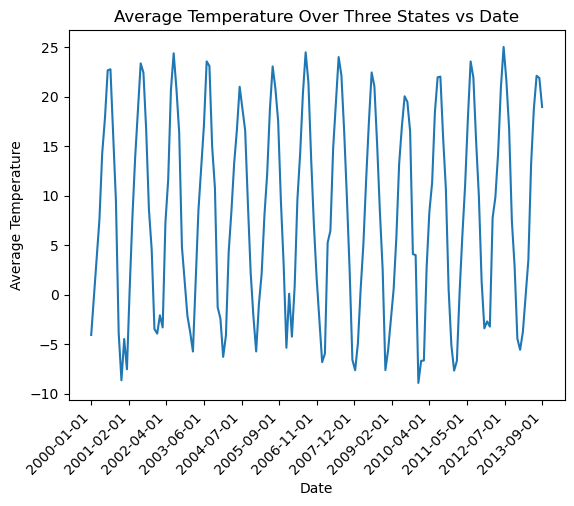

In [7]:
plt.figure()
x = grouped_data['dt']
y = grouped_data['AverageTemperature']
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Three States vs Date')
indices = np.linspace(0, len(x)-1, 13)
plt.xticks(indices, x.iloc[indices], rotation=45, ha='right')
plt.show()

In [8]:
import scipy.optimize as fit

In [9]:
grouped_data['dt'] = grouped_data['dt'].astype(str)
grouped_data['Year'] = grouped_data['dt'].str[:4].astype(int)
grouped_data['Day'] = grouped_data['dt'].str[8:10].astype(int)
grouped_data['Month'] = grouped_data['dt'].str[5:7].astype(int)
grouped_data['Date_Integer'] = grouped_data['Year'] + ((grouped_data['Month'] - 1) / 12) + ((grouped_data['Day']) / 365)
display(grouped_data[['dt','Date_Integer','AverageTemperature']])

,dt,Date_Integer,AverageTemperature
0,2000-01-01,2000.002740,-4.072000
1,2000-02-01,2000.086073,-0.205000
2,2000-03-01,2000.169406,3.642667
3,2000-04-01,2000.252740,7.609667
4,2000-05-01,2000.336073,14.255000
...,...,...,...
160,2013-05-01,2013.336073,13.196000
161,2013-06-01,2013.419406,18.783667
162,2013-07-01,2013.502740,22.110333
163,2013-08-01,2013.586073,21.890000


In [10]:
print(abs(max(grouped_data['AverageTemperature'])-min(grouped_data['AverageTemperature']))/2)

16.973166666666668


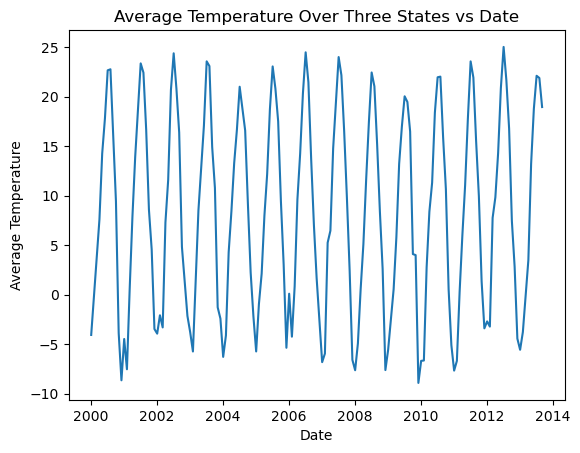

In [11]:
plt.figure()
x = grouped_data['Date_Integer']
y = grouped_data['AverageTemperature']
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Three States vs Date')
plt.show()

In [12]:
#initial guess for curve fit: line
def f(x,a,b,c,d):
    return a*np.cos(b*(x + c)) + d
p0 = [abs(max(grouped_data["AverageTemperature"])-min(grouped_data["AverageTemperature"]))/(2), 2*np.pi, grouped_data['Day'][0]-2000, grouped_data["AverageTemperature"].mean()]
parameters, covariance_matrix = fit.curve_fit(f, grouped_data['Date_Integer'], grouped_data["AverageTemperature"], p0)

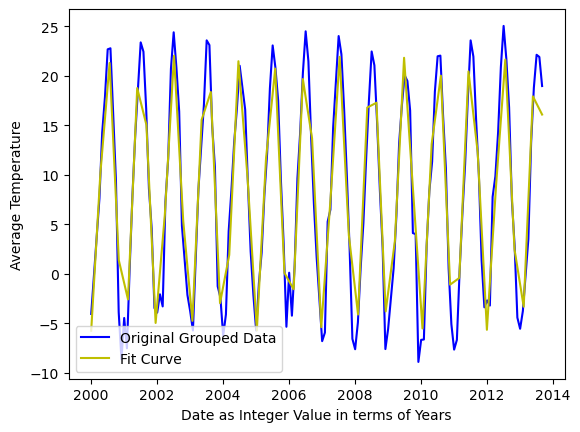

In [13]:
plt.figure()
plt.plot(grouped_data['Date_Integer'], grouped_data["AverageTemperature"], label="Original Grouped Data", color="blue")
x = np.linspace(min(grouped_data['Date_Integer']), max(grouped_data['Date_Integer']))
plt.plot(x, f(x, parameters[0], parameters[1], parameters[2], parameters[3]), label='Fit Curve', color='y')
plt.xlabel('Date as Integer Value in terms of Years')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()

In [14]:
covariance_matrix

array([[ 5.11173911e-02,  8.55243198e-07, -6.98385884e-06,
         3.97610719e-04],
       [ 8.55243198e-07,  1.72944362e-05, -2.15580353e-05,
         1.22253768e-05],
       [-6.98385884e-06, -2.15580353e-05,  3.36832667e-05,
        -2.43162599e-05],
       [ 3.97610719e-04,  1.22253768e-05, -2.43162599e-05,
         2.57621483e-02]])

In [15]:
a_error = covariance_matrix[0,0]**0.5
b_error = covariance_matrix[1,1]**0.5
c_error = covariance_matrix[2,2]**0.5
d_error = covariance_matrix[3,3]**0.5
a = parameters[0]
b = parameters[1]
c = parameters[2]
d = parameters[3]

In [16]:
print('a={0:1.5f} +\- {1:1.5f}'.format(a,a_error))
print('b={0:1.5f} +\- {1:1.5f}'.format(b,b_error))
print('c={0:1.5f} +\- {1:1.5f}'.format(c,c_error))
print('d={0:1.5f} +\- {1:1.5f}'.format(d,d_error))

a=-13.89960 +\- 0.22609
b=6.27937 +\- 0.00416
c=-1999.00740 +\- 0.00580
d=8.12295 +\- 0.16051


In [17]:
equation = f"Temperature = {parameters[0]:1.5f} * cos( {parameters[1]:1.5} * (date + {parameters[2]:1.5f})) + {parameters[3]:1.5f}"
print("\nFinal Equation:")
print(equation)


Final Equation:
Temperature = -13.89960 * cos( 6.2794 * (date + -1999.00740)) + 8.12295


# Problem 2

In [18]:
import pandas as pd

In [19]:
#colnames=['CCl4ottoyr', 'CCl4ottomon', 'CCl4ottoNHm', 'CCl4ottoNHsd', 'CCl4ottoSHm', 'CCl4ottoSHsd', 'CCl4ottoGLm', 'CCl4ottoGLsd'] 
#global_CC14_MM = pd.read_csv('global_CCl4_MM.dat', sep=' ',skiprows=111)
#display(global_CC14_MM)

#Here, I started with pandas, but in the boxes below, I use astropy
#I did not read instructions carefully enough at first. This is a good way to check my work anyway
global_CC14_MM = pd.read_csv('global_CCl4_MM.dat', sep='\s+', skiprows=111)
display(global_CC14_MM)

,CCl4ottoyr,CCl4ottomon,CCl4ottoNHm,CCl4ottoNHsd,CCl4ottoSHm,CCl4ottoSHsd,CCl4ottoGLm,CCl4ottoGLsd
0,1996,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1996,2,NaN,NaN,NaN,NaN,NaN,NaN
2,1996,3,NaN,NaN,NaN,NaN,NaN,NaN
3,1996,4,105.318,0.197,102.969,0.238,104.144,0.155
4,1996,5,105.032,0.193,102.754,0.287,103.893,0.174
...,...,...,...,...,...,...,...,...
283,2019,8,NaN,NaN,NaN,NaN,NaN,NaN
284,2019,9,NaN,NaN,NaN,NaN,NaN,NaN
285,2019,10,NaN,NaN,NaN,NaN,NaN,NaN
286,2019,11,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
from astropy.io import ascii
data = ascii.read('global_CCl4_MM.dat')
display(data)

CCl4ottoyr,CCl4ottomon,CCl4ottoNHm,CCl4ottoNHsd,CCl4ottoSHm,CCl4ottoSHsd,CCl4ottoGLm,CCl4ottoGLsd
int32,int32,float64,float64,float64,float64,float64,float64
1996,1,nan,nan,nan,nan,nan,nan
1996,2,nan,nan,nan,nan,nan,nan
1996,3,nan,nan,nan,nan,nan,nan
1996,4,105.318,0.197,102.969,0.238,104.144,0.155
1996,5,105.032,0.193,102.754,0.287,103.893,0.174
1996,6,105.327,0.277,103.086,0.273,104.207,0.191
1996,7,105.25,0.171,103.021,0.233,104.136,0.147
1996,8,104.855,0.239,102.817,0.213,103.836,0.161
1996,9,104.909,0.248,102.813,0.441,103.861,0.254


In [21]:
from astropy.table import Table

In [22]:
t = Table(data)
df = t.to_pandas()
df = df[['CCl4ottoyr', 'CCl4ottomon', 'CCl4ottoGLm', 'CCl4ottoGLsd']]
display(df)

,CCl4ottoyr,CCl4ottomon,CCl4ottoGLm,CCl4ottoGLsd
0,1996,1,NaN,NaN
1,1996,2,NaN,NaN
2,1996,3,NaN,NaN
3,1996,4,104.144,0.155
4,1996,5,103.893,0.174
...,...,...,...,...
283,2019,8,NaN,NaN
284,2019,9,NaN,NaN
285,2019,10,NaN,NaN
286,2019,11,NaN,NaN


In [23]:
df['CCl4ottoDate'] = df['CCl4ottoyr'] + (df['CCl4ottomon']/12)
df = df[['CCl4ottoDate', 'CCl4ottoGLm', 'CCl4ottoGLsd']]
display(df)

,CCl4ottoDate,CCl4ottoGLm,CCl4ottoGLsd
0,1996.083333,NaN,NaN
1,1996.166667,NaN,NaN
2,1996.250000,NaN,NaN
3,1996.333333,104.144,0.155
4,1996.416667,103.893,0.174
...,...,...,...
283,2019.666667,NaN,NaN
284,2019.750000,NaN,NaN
285,2019.833333,NaN,NaN
286,2019.916667,NaN,NaN


In [24]:
df = df.dropna()
display(df)

,CCl4ottoDate,CCl4ottoGLm,CCl4ottoGLsd
3,1996.333333,104.144,0.155
4,1996.416667,103.893,0.174
5,1996.500000,104.207,0.191
6,1996.583333,104.136,0.147
7,1996.666667,103.836,0.161
...,...,...,...
278,2019.250000,79.008,0.199
279,2019.333333,78.623,0.149
280,2019.416667,78.862,0.226
281,2019.500000,78.598,0.165


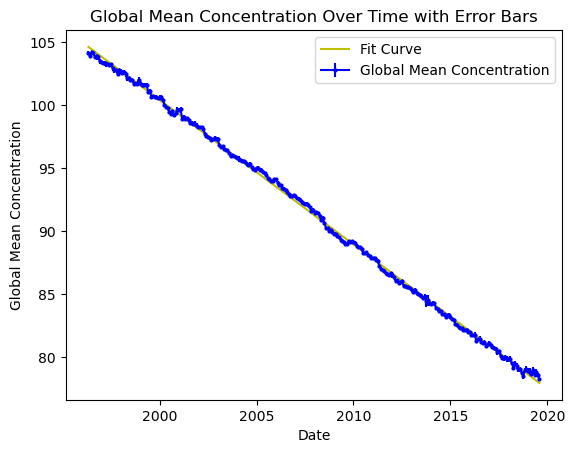

In [68]:
def curve(x,m,b):
    return m*x + b
p0 = [((df['CCl4ottoGLm'].iloc[-1] - df['CCl4ottoGLm'].iloc[0]) / (df['CCl4ottoDate'].iloc[-1] - df['CCl4ottoDate'].iloc[0])),120]
paraC, covarC = fit.curve_fit(curve, df['CCl4ottoDate'], df["CCl4ottoGLm"], p0)
plt.figure()
plt.errorbar(df['CCl4ottoDate'], df['CCl4ottoGLm'], yerr=df['CCl4ottoGLsd'], fmt=".-", markersize=4, label='Global Mean Concentration', color='blue')
x = np.linspace(min(df['CCl4ottoDate']), max(df['CCl4ottoDate']), 200)
plt.plot(x, curve(x, paraC[0], paraC[1]), label='Fit Curve', color='y')
plt.xlabel('Date')
plt.ylabel('Global Mean Concentration')
plt.title('Global Mean Concentration Over Time with Error Bars')
plt.legend()
plt.show()

In [69]:
print(covarC)

[[ 4.85869383e-06 -9.75605479e-03]
 [-9.75605479e-03  1.95899720e+01]]


In [70]:
print(paraC[0])
print(paraC[1])

-1.146043221215281
2392.4998756851146


In [71]:
chi = sum(((df['CCl4ottoGLm']-curve(df['CCl4ottoDate'],paraC[0],paraC[1]))/df['CCl4ottoGLsd'])**2)
#chi
red_chi = chi / (len(df['CCl4ottoGLm'])-2)
red_chi

4.60678789356863

In [74]:
m_error = covarC[0,0]**0.5
b_error = covarC[1,1]**0.5
m = paraC[0]
b = paraC[1]

In [75]:
print('m={0:1.5f} +\- {1:1.5f}'.format(m,m_error))
print('b={0:1.5f} +\- {1:1.5f}'.format(b,b_error))

m=-1.14604 +\- 0.00220
b=2392.49988 +\- 4.42606


In [77]:
equation = f"CCl4ottoGLm = {paraC[0]:1.5f} * x + {paraC[1]:1.5f}"
print("\nFinal Equation:")
print(equation)


Final Equation:
CCl4ottoGLm = -1.14604 * x + 2392.49988
